In [4]:
import pandas as pd
import json
import sqlite3 as sql3
import os
import matplotlib.pyplot as plt

In [16]:
f = json.load(open('china_tables.json', 'r'))
type(f)

dict

In [18]:
f['201801']

'<div class="TRS_Editor"><div align="center"><table border="0" cellpadding="0" cellspacing="0" class="MsoNormalTable" style="width: 100%; border-collapse: collapse" width="100%"> <tbody> <tr style="height: 1pt"> <td colspan="12" style="height: 1pt; width: 100%; padding-bottom: 0cm; padding-top: 0cm; padding-left: 0cm; padding-right: 0cm" width="100%"> <p align="justify" class="MsoNormal" style="text-align: center; line-height: 12pt; margin-right: 5.25pt"><b><span lang="EN-US" style=\'font-size: 12pt; font-family: "Arial", "sans-serif"\'>Sales Price Indices of Newly Constructed Commercial Residential Buildings in 15 First-tier Cities and Hot Second-tier Cities</span></b></p> </td> </tr> <tr style="height: 14.2pt"> <td colspan="12" style="height: 14.2pt; width: 100%; padding-bottom: 0cm; padding-top: 0cm; padding-left: 5.4pt; padding-right: 5.4pt" width="100%"> <p align="justify" class="MsoNormal" style="line-height: 12pt"><span lang="EN-US" style=\'font-size: 10pt; font-family: "Arial N

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'China_data_collection.ipynb',
 'China_extraction.ipynb',
 'China_map.ipynb',
 'newRes.csv',
 'newRes90.csv',
 'places.sqlite',
 'secRes.csv',
 'secRes90.csv',
 'links.txt',
 'newstart.ipynb',
 'china_tables.json']

In [6]:
with open('china_tables.json', 'r') as f:
    dick = json.load(f)

len(dick)

69

In [8]:
sorted(dick.keys())[-14:]

['201903',
 '201904',
 '201905',
 '201906',
 '201907',
 '201908',
 '201909',
 '201910',
 '201911',
 '201912',
 '202001',
 '202002',
 '202003',
 '202004']

In [93]:
nr = pd.read_csv('newRes_clean.csv', index_col= 0)
sr = pd.read_csv('secRes_clean.csv', index_col= 0)
nr9 = pd.read_csv('newRes90.csv', index_col= 0)
sr9 = pd.read_csv('secRes90_clean.csv', index_col= 0)
nr.shape,sr.shape,nr9.shape,sr9.shape

((70, 69), (70, 69), (70, 76), (70, 69))

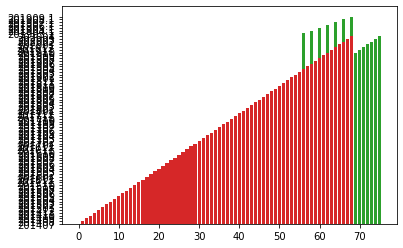

In [94]:
for i in [nr,sr,nr9,sr9]:
    i = i[i.columns.sort_values()]
    
    plt.bar(range(len(i.columns)),i.columns.sort_values())

In [95]:
nr9.columns.sort_values()

Index(['201407', '201408', '201409', '201410', '201411', '201412', '201501',
       '201502', '201503', '201504', '201505', '201506', '201507', '201508',
       '201510', '201511', '201512', '201601', '201602', '201603', '201604',
       '201605', '201606', '201607', '201608', '201609', '201610', '201611',
       '201612', '201701', '201702', '201703', '201704', '201705', '201706',
       '201707', '201708', '201709', '201710', '201711', '201712', '201801',
       '201802', '201803', '201804', '201805', '201806', '201807', '201808',
       '201809', '201810', '201811', '201812', '201901', '201902', '201903',
       '201903.1', '201904', '201904.1', '201905', '201905.1', '201906',
       '201906.1', '201907', '201907.1', '201908', '201908.1', '201909',
       '201909.1', '201910', '201911', '201912', '202001', '202002', '202003',
       '202004'],
      dtype='object')

In [96]:
nr9 = nr9[nr9.columns.sort_values()]

In [97]:
nr9.loc[:,'201903':]

,201903,201903.1,201904,201904.1,201905,201905.1,201906,201906.1,201907,201907.1,...,201908.1,201909,201909.1,201910,201911,201912,202001,202002,202003,202004
Anqing,—,—,100.5,100.5,100.1,100.1,99.4,99.4,100.5,100.5,...,100.5,99.8,99.8,100.0,99.8,99.4,100.8,99.9,100.0,99.5
Baotou,100.3,100.3,100.9,100.9,100.8,100.8,100.5,100.5,99.4,99.4,...,100.1,100.9,100.9,100.6,100.0,100.3,100.9,100.9,100.7,100.1
Beihai,100.7,100.7,101.0,101.0,101.0,101.0,101.4,101.4,100.8,100.8,...,100.9,101.2,101.2,99.9,100.2,100.1,100.6,100.5,99.7,100.0
Beijing,99.8,99.8,100.1,100.1,100.5,100.5,100.4,100.4,100.0,100.0,...,100.3,100.3,100.3,99.9,99.6,100.8,100.6,100.3,99.1,100.4
Bengbu,99.2,99.2,100.2,100.2,100.7,100.7,100.3,100.3,101.2,101.2,...,100.5,99.4,99.4,100.1,100.3,100.5,100.2,100.8,100.0,99.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yinchuan,100.5,100.5,100.8,100.8,101.0,101.0,100.3,100.3,101.3,101.3,...,100.7,101.6,101.6,101.9,100.6,102.0,101.1,101.2,99.6,100.9
Yueyang,99.0,99.0,99.5,99.5,100.8,100.8,99.8,99.8,99.8,99.8,...,99.7,99.6,99.6,99.0,100.5,99.5,99.2,99.4,99.9,100.2
Zhanjiang,100.7,100.7,100.7,100.7,100.2,100.2,100.4,100.4,100.7,100.7,...,100.7,100.6,100.6,100.3,100.9,99.7,100.9,98.7,99.9,99.6
Zhengzhou,100.2,100.2,100.4,100.4,100.6,100.6,100.1,100.1,100.8,100.8,...,100.4,100.1,100.1,100.3,100.2,99.6,99.4,99.9,100.0,99.8


In [98]:
dels = nr9.columns.str.extractall(r'(\d{6}.\d)')

In [99]:
dels['w'] = dels[0].str.replace('\.1','')
dels

,,0,w
,match,,
56,0,201903.1,201903
58,0,201904.1,201904
60,0,201905.1,201905
62,0,201906.1,201906
64,0,201907.1,201907
66,0,201908.1,201908
68,0,201909.1,201909


In [100]:
nr9.drop(dels['w'], axis = 1, inplace = True)

In [101]:
nr9.shape

(70, 69)

In [102]:
renev = {ii[0]:ii['w'] for _, ii in dels.iterrows()}
renev

{'201903.1': '201903',
 '201904.1': '201904',
 '201905.1': '201905',
 '201906.1': '201906',
 '201907.1': '201907',
 '201908.1': '201908',
 '201909.1': '201909'}

In [103]:
nr9.rename(renev, axis = 1, inplace = True)
nr9.columns

Index(['201407', '201408', '201409', '201410', '201411', '201412', '201501',
       '201502', '201503', '201504', '201505', '201506', '201507', '201508',
       '201510', '201511', '201512', '201601', '201602', '201603', '201604',
       '201605', '201606', '201607', '201608', '201609', '201610', '201611',
       '201612', '201701', '201702', '201703', '201704', '201705', '201706',
       '201707', '201708', '201709', '201710', '201711', '201712', '201801',
       '201802', '201803', '201804', '201805', '201806', '201807', '201808',
       '201809', '201810', '201811', '201812', '201901', '201902', '201903',
       '201904', '201905', '201906', '201907', '201908', '201909', '201910',
       '201911', '201912', '202001', '202002', '202003', '202004'],
      dtype='object')

In [104]:
nr9.to_csv('newRes90_clean.csv')